In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

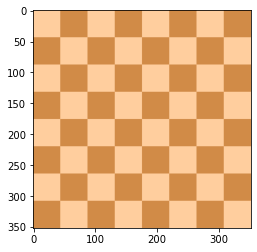

In [7]:
plt.imshow(flat_chess)

In [9]:
gray_flat = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)

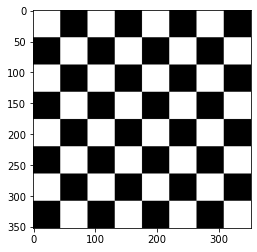

In [11]:
plt.imshow(gray_flat,cmap='gray')

In [23]:
real_chess = cv2.imread('DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

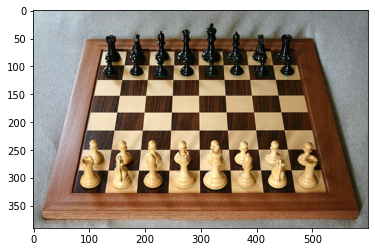

In [24]:
plt.imshow(real_chess)

In [25]:
gray_real = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

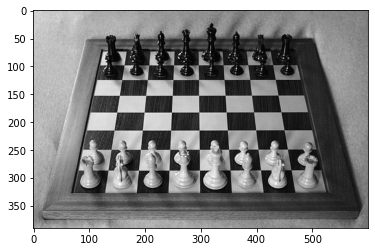

In [27]:
plt.imshow(gray_real, cmap='gray')


# Harris Corner Detection
cornerHarris Function

- src Input single-channel 8-bit or floating-point image.
- dst Image to store the Harris detector responses. It has the type CV_32FC1 and the same size as src .
- blockSize Neighborhood size (see the details on #cornerEigenValsAndVecs ).
- ksize Aperture parameter for the Sobel operator.
- k Harris detector free parameter. See the formula in DocString
- borderType Pixel extrapolation method. See #BorderTypes.

In [50]:
gray = np.float32(gray_flat)


In [51]:
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)


In [52]:
dst = cv2.dilate(dst,None)

In [56]:
flat_chess[dst>0.01*dst.max()]=[255,0,0]


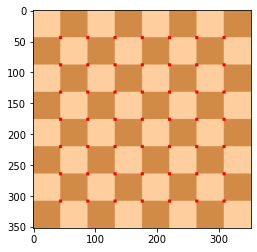

In [57]:
plt.imshow(flat_chess)

In [71]:
gray = np.float32(gray_real)


In [75]:
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)


In [76]:
dst2 = cv2.dilate(dst2,None)

In [77]:
real_chess[dst>0.01*dst.max()]=[255,0,0]


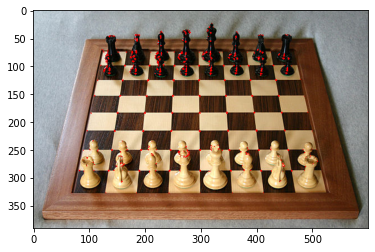

In [78]:
plt.imshow(real_chess)

# Shi-Tomasi Corner Detector & Good Features to Track Paper


goodFeatureToTrack Function Parameters

- image Input 8-bit or floating-point 32-bit, single-channel image.
- corners Output vector of detected corners.
- maxCorners Maximum number of corners to return. If there are more corners than are found,the strongest of them is returned. maxCorners <= 0 implies that no limit on the maximum is set and all detected corners are returned.
- qualityLevel Parameter characterizing the minimal accepted quality of image corners. The parameter value is multiplied by the best corner quality measure, which is the minimal eigenvalue (see #cornerMinEigenVal ) or the Harris function response (see #cornerHarris ). The corners with the quality measure less than the product are rejected. For example, if the best corner has the quality measure = 1500, and the qualityLevel=0.01 , then all the corners with the quality measure less than 15 are rejected.

In [81]:
# Need to reset the images since we drew on them
flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
gray_flat = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)

In [84]:
corners = cv2.goodFeaturesToTrack(gray_flat,5,0.01,10)


In [85]:
corners

array([[[308., 308.]],

       [[264., 308.]],

       [[220., 308.]],

       [[176., 308.]],

       [[132., 308.]]], dtype=float32)

In [86]:
corners = np.int0(corners)

In [87]:
corners

array([[[308, 308]],

       [[264, 308]],

       [[220, 308]],

       [[176, 308]],

       [[132, 308]]])

In [92]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,255,-1)

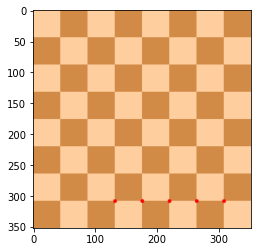

In [94]:
plt.imshow(flat_chess)


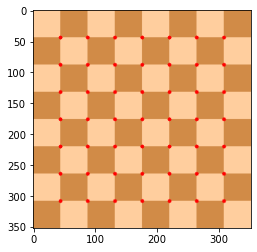

In [99]:
corners = cv2.goodFeaturesToTrack(gray_flat,64,0.01,10)
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,255,-1)
plt.imshow(flat_chess)


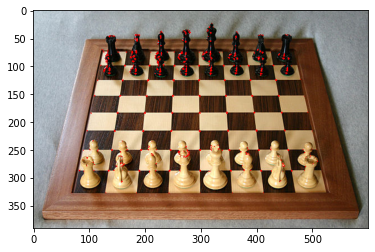

In [102]:
corners = cv2.goodFeaturesToTrack(gray_real,80,0.01,10)
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,255,-1)
plt.imshow(real_chess)